<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Задание 1

In [ ]:
"""
1) Как критики относятся к спортивным играм?
2) Критикам нравятся больше игры на PC или на PS4?
3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.
"""

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64
--------------------
count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64


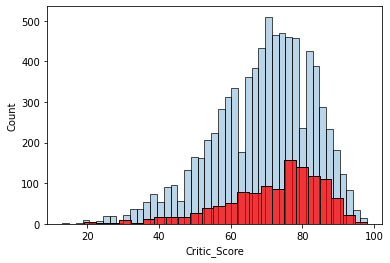

In [ ]:
# Спортивные игры
# сперва посмотрим основные статистики и гистограммы всех оценок критиков и оценок спортивных игр
print(df['Critic_Score'].dropna().describe())
print('--'*10)
print(df[df['Genre'] == 'Sports']['Critic_Score'].dropna().describe())
sns.histplot(df['Critic_Score'], alpha = 0.3)
sns.histplot(df[df['Genre'] == 'Sports']['Critic_Score'], color = 'r')

In [ ]:
# видим, что распределения похо тожи на нормальные и подобны друг другу, средние и дисперсии практически не отличаются. Можно сформировать гипотезу:
# Н0: критики относятся к спортивным играм так же, как и к остальным - оценки в среднем не отличаются, порог значимости = 0.05
# H1: разница в отношении есть.
sport_scores = df[df['Genre'] == 'Sports']['Critic_Score'].dropna()
all_scores = df['Critic_Score'].dropna()
tstat, pvalue = stats.ttest_1samp( a = sport_scores, popmean = all_scores.mean() )
tstat, pvalue

(7.470587451672033, 1.538088875231057e-13)

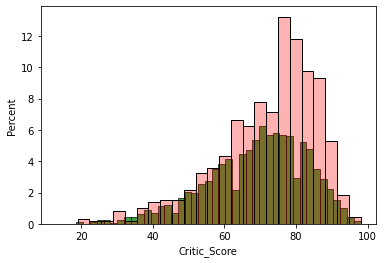

In [ ]:
# интересно. Н0 должна быть отвергнута и исходя из t-статистики должно быть сильное отклонение между оценками спортивных игр
# и просто всех игр с перевесом спортивных. Значит, первая визуализация была неверна. Посмотрим в процентном соотношении.
sns.histplot(all_scores,  stat = 'percent', color = 'g')
sns.histplot(sport_scores, alpha = 0.3, color = 'r', stat = 'percent' )

In [ ]:
# теперь видно, что среди ~1200 спротивных игр доля с высокой оценкой сильно выше, чем среди ~8000 игр вообще.
# в гипотезе мы не учитывали атрибут "количество оценок". Посмотрим, насколько отличаются у спортивных и всех.
print(df['Critic_Count'].describe())
print('--'*10)
print(df[df['Genre'] == 'Sports']['Critic_Count'].describe())

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64
--------------------
count    1194.000000
mean       21.030151
std        13.663692
min         4.000000
25%        10.000000
50%        18.000000
75%        29.000000
max        75.000000
Name: Critic_Count, dtype: float64


6.288660520006862 9.384927417112147e-10


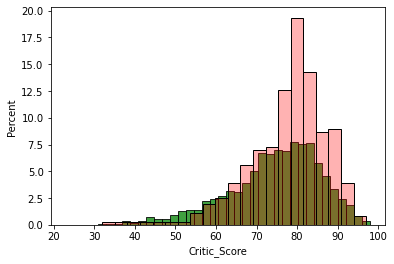

In [ ]:
# У спортивных меньше в среднем оценок, но также меньше вариация. Проверим результаты выше с учётом только тех игр, которые получили
# оценок выше среднего количества.Н0: отличий нет, Н1: обратная. Порог 0.05.
all = df['Critic_Score'].loc[df['Critic_Count'] > 25]
sport = df[df['Genre'] == 'Sports']['Critic_Score'].loc[df['Critic_Count'] > 25]
tstat, pvalue = stats.ttest_1samp( a = sport, popmean = all.mean() )
print(tstat, pvalue)
sns.histplot(all,  stat = 'percent', color = 'g')
sns.histplot(sport, alpha = 0.3, color = 'r', stat = 'percent' )

In [ ]:
# Подтверждение предыдушего.Н0 отвергнута, спортивные игры действительно выделяются более высокими оценками из генеральной совокупности игр.

In [ ]:
# платформы, сперва статистики

pc = df[df['Platform'] == 'PC']['Critic_Score'].dropna()
ps4 = df[df['Platform'] == 'PS4']['Critic_Score'].dropna()
print(pc.describe())
print('--'*10)
print(ps4.describe())

count    715.000000
mean      75.928671
std       11.170775
min       33.000000
25%       70.000000
50%       78.000000
75%       84.000000
max       96.000000
Name: Critic_Score, dtype: float64
--------------------
count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: Critic_Score, dtype: float64


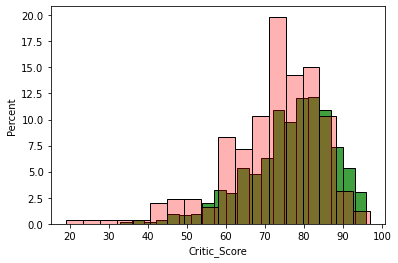

In [ ]:
sns.histplot(pc,  stat = 'percent', color = 'g')
sns.histplot(ps4, alpha = 0.3, color = 'r', stat = 'percent' )

In [ ]:
# интересная ситуация: ps4 превосходит в процентах pc
# в первых трёх квартилях. У ps4 есть игры с крайне низкими оценками и при этом игр с действительно высокими значительно больше у pc.
# у нас две независимые выборки. Н0: критики равны в своих оценках Н1: неравны.
# уровень значимости - 0.05. Вариации столь близки, что можно счесть равными
tstat, pvalue = stats.ttest_ind( ps4, pc)
tstat, pvalue

(-4.544112457929973, 6.215797831285281e-06)

In [ ]:
# Отвергаем Н0,  и по значению т-статистики можем утверждать, что
# критики в среднем оценивают pc выше.

In [ ]:
#стратегии/стрелялки

shooters = df[df['Genre'] == 'Shooter']['Critic_Score'].dropna()
strategies = df[df['Genre'] == 'Strategy']['Critic_Score'].dropna()
print(shooters.describe())
print('--'*10)
print(strategies.describe())

count    944.000000
mean      70.181144
std       14.552571
min       22.000000
25%       61.000000
50%       73.000000
75%       81.000000
max       97.000000
Name: Critic_Score, dtype: float64
--------------------
count    302.000000
mean      72.086093
std       11.828475
min       35.000000
25%       65.000000
50%       73.000000
75%       80.000000
max       94.000000
Name: Critic_Score, dtype: float64


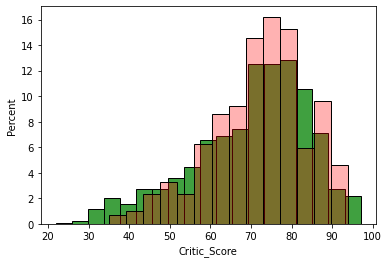

In [ ]:
# потеряли половину стратегий после удаления nan
# видим одинаковые медианы, близкие средние и разные СКО.
sns.histplot(shooters,  stat = 'percent', color = 'g')
sns.histplot(strategies, alpha = 0.3, color = 'r', stat = 'percent' )

In [ ]:
# гистограмма показывает большую дисперсию шутеров. Кажется, что к стратегиям критики благосклонней.
# но нужно помнить, что шутеров в три раза больше.
# Н0: критики равны в оценках Н1: неравны. Уровень 0.05
tstat, pvalue = stats.ttest_ind(shooters, strategies, equal_var = False)
tstat, pvalue

(-2.2972408230640315, 0.021938989522304823)

In [ ]:
# тест показывает, что критики неравны и оценивают стратегии в среднем выше, чем стрелялки.

Задание 2

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

spam_df= pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
spam_df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam_df.head(20)

In [ ]:
# посморим количество строк со спамом
spam_df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
# уберём служебные символы
spam_df['Message']=spam_df['Message'].replace(to_replace='[\W_]+', regex=True, value = ' ')

In [ ]:
def purifier(line):
    """
        функция возвращает строку в ниж.рег., без стопслов и в лемматизированной форме
    """
    stopwords_set = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    line = line.lower().split()
    for word in line:
        if word in stopwords_set:
            line.remove(word)
        word = lemmatizer.lemmatize(word)
    return ' '.join(line)

spam_df['Message'] = spam_df['Message'].apply(purifier)

In [ ]:
spam_df.head()

,Category,Message
0,ham,go jurong point crazy available in bugis n gre...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah don think goes usf lives around though


In [ ]:
# в принципе, при создании объекта tfidf можно было сделать и стоп-слова, и нижний регистр(с лемматизацией не разобрался - можно ли, нет),
# но в итоге не стал вносить доп.параметры
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam_df['Message'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_matrix.head()

In [ ]:
# ради примера посмотрим на частотность слова "free"
tfidf_matrix['free'].value_counts()

0.000000    5343
0.184106       3
0.278788       3
0.139587       3
0.121285       3
            ... 
0.145897       1
0.160241       1
0.129567       1
0.301018       1
0.167189       1
Name: free, Length: 196, dtype: int64

In [ ]:
# разделим данные, создадим логистическую регрессию, натренируем
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam_df['Category'], random_state = 42, test_size = 0.3)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [ ]:
# проверим точность и создадим матрицу ошибок
print(accuracy_score(y_test, lr.predict(X_test)))
print()
print(confusion_matrix(y_test, lr.predict(X_test)))

0.9599282296650717

[[1446    2]
 [  65  159]]


In [ ]:
# Всего 67 ошибок, из них 65 ошибки первого рода
y_test

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [ ]:
# создадим df с реальными и предсказанными ответами
check_df = pd.merge(pd.DataFrame(y_test).reset_index(), pd.DataFrame(lr.predict(X_test)), left_index = True, right_index = True)
check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1672 non-null   int64 
 1   Category  1672 non-null   object
 2   0         1672 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.3+ KB


In [ ]:
# отберём только несовпавшие, объединим с исходным spam_df, выведем сообщения
check_df = check_df.loc[check_df['Category'] != check_df[0]]
mistakes_df = pd.merge(check_df, spam_df, left_on = check_df['index'], right_index = True, how = 'left')
mistakes_df = mistakes_df[['Category_x',0,'Message']]
mistakes_df  = mistakes_df.rename(columns = {'Category_x':'Real_category',0:'Pred_category'})
mistakes_df

,Real_category,Pred_category,Message
40,spam,ham,reminder have downloaded content have already ...
74,spam,ham,oh god ve found number i so glad text back xaf...
84,spam,ham,next amazing xxx picsfree1 video be sent you e...
119,spam,ham,rock yr chik get 100 of filthy films xxx pics ...
160,spam,ham,babe u want dont u baby im nasty have thing 4 ...
...,...,...,...
1525,spam,ham,freemsg hi baby wow got new cam moby wanna c h...
1567,spam,ham,have important customer service announcement p...
1569,spam,ham,themob check our newest selection content game...
1576,ham,spam,you free can call


In [ ]:
# в итоге наша модель сочла спамом два сообщения с очевидно спамовыми сочетаниями free и call.
mistakes_df[(mistakes_df['Pred_category'] == 'spam') & (mistakes_df['Real_category'] == 'ham')]

,Real_category,Pred_category,Message
1471,ham,spam,sir am waiting your call free please call
1576,ham,spam,you free can call


In [ ]:
mistakes_df[(mistakes_df['Pred_category'] == 'ham') & (mistakes_df['Real_category'] == 'spam')]

In [ ]:
# Ещё раз благодарю за курс! Было очень интересно.

In [ ]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: Category, Length: 1672, dtype: object

In [ ]:

one_more = y_test.map(dict(ham=0, spam=1))

In [ ]:
one_more

3245    0
944     0
1044    0
2484    0
812     0
       ..
2505    0
2525    1
4975    0
650     1
4463    0
Name: Category, Length: 1672, dtype: int64

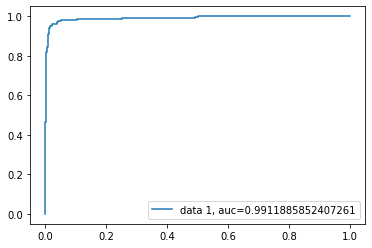

In [ ]:
from sklearn import metrics
# ROC
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(one_more,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
pd.Series(lr.predict(X_test),index = y_test.index, name = 'predict')

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: predict, Length: 1672, dtype: object

In [ ]:
# вариант с конкатенацией - проще и элегантней моего мёрджа.
df_bad = pd.concat([spam_df[spam_df.index.isin(y_test.index)],
pd.Series(lr.predict(X_test),index = y_test.index, name = 'predict')],axis=1, join = 'inner')

df_bad = df_bad[df_bad['Category'] != df_bad['predict']]
df_bad

,Category,Message,predict
15,spam,xxxmobilemovieclub use credit click wap link t...,ham
19,spam,england v macedonia dont miss goals team news ...,ham
68,spam,you hear the new divorce barbie comes all ken ...,ham
95,spam,free ringtone waiting be collected simply text...,ham
135,spam,want 2 get laid tonight want real dogging loca...,ham
...,...,...,...
4652,spam,400 xmas reward waiting computer randomly pick...,ham
5037,spam,won believe but s true s incredible txts reply...,ham
5120,spam,private 2003 account statement 078,ham
5366,spam,400 xmas reward waiting computer randomly pick...,ham


In [ ]:
df_bad[(df_bad['Category'] == 'ham') & (df_bad['predict'] == 'spam')]

,Category,Message,predict
495,ham,you free can call,spam
3692,ham,sir am waiting your call free please call,spam
